# Solutions for Lab Sheet 2 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-2-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
# import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

## Generate sine wave - Tasks 1-4 

The following function `get_sine_wave()` creates a sinus signal with a particular frequency.

Just note, it is common practice to describe the functions and its input and output parameters as done here exemplarily in the multi-line comment.

In [2]:
def get_sine_wave(frequency_hz, length_s=1, sample_rate_hz=8000):
    """
    Return a sine wave with given parameters.
    
    Parameters
    ----------
    frequency_hz : float
        frequency $f$ of the sinus to be generated 
    length_s : float, optional
        length of the sine signal to be generated, default: 1 sec.
    sample_rate_hz : float, optional
        sampling frequency $f_s$, default: 8000 Hz

    Returns
    -------
    signal
        generated sinus signal
    """
    # create time vector $t$
    time_points = np.linspace(0, length_s,
                              int(length_s * sample_rate_hz),
                              endpoint=False)
    # return sinus of frequency $f$, i.e. variable frequency_hz
    return np.sin(2 * np.pi * frequency_hz * time_points)

The following code creates and visualises a sinus of $f=440$ Hz, the so called [concert pitch](https://en.wikipedia.org/wiki/Concert_pitch "Open Wikipedia for more information on Concert Pitch") or also musical note **A** on a keyboard. 

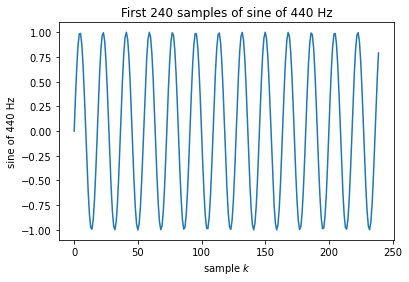

In [3]:
# crate a sinus of f=440 Hz at a sampling frequency f_s = 8 kHz of 2 seconds length
concert_pitch = get_sine_wave(440, 2, 8000)
# Look at the first 30 ms (240 / 8000 = 0.03 s) of the generated wave
plt.plot(concert_pitch[:240])
plt.xlabel('sample $k$')
plt.ylabel('sine of 440 Hz')
plt.title('First 240 samples of sine of 440 Hz')
None # This command does nothing but prevents printing the result of previous function call

We can listen to the signal, using the `IPython.display.Audio()` command.

In [4]:
# listen to the sound file 
from IPython import display as ipd
ipd.Audio(concert_pitch, rate=8000, normalize=False)

We can concatenate signals to form a longer signal.
As an example we want to create a new signal with half the concert pitch frequency and then play it 2 times alternating with the concert pitch.

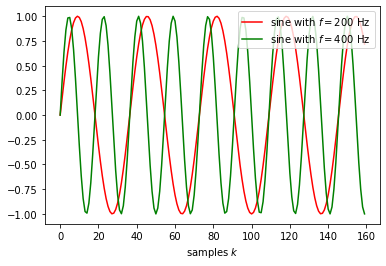

In [5]:
half_concert_pitch = get_sine_wave(220, 2, 8000)
# Look at the first 0.02 s of the signals

plt.plot(half_concert_pitch[:160], "red",label="sine with $f=200$ Hz")
plt.plot(concert_pitch[:160], "green",label="sine with $f=400$ Hz")
plt.xlabel('samples $k$')
plt.legend(loc='upper right') # create a legend showing the line labels 

alternation = np.concatenate((half_concert_pitch, concert_pitch,
                              half_concert_pitch, concert_pitch))
ipd.Audio(alternation, rate=8000)

We can observe that the green `concert_pitch` has a frequency which is exactly double that of the red signal `half_concert_pitch`, i.e. when two periods of green curve fit in one period of red curve (see e.g. between samples $k=0$ and $k \approx 34$).

Adding together two signals gives a signal where both frequencies can be heard.
The resulting signal does not look like a sine wave anymore but we can still clearly see its periodicity. Later in this module (and in later lab sheets) we will analyse the frequency content in the frequency domain and will learn that such signals can be better distinguished in the frequency domain.

The periodicity is so promiment because one frequency is a multiple of the other.
If this is not the case it can take much longer for the signal to repeat its pattern.

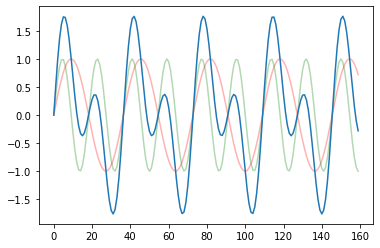

In [6]:
plt.plot(half_concert_pitch[:160], "red", alpha=0.3)
plt.plot(concert_pitch[:160], "green", alpha=0.3)
plt.plot(half_concert_pitch[:160] + concert_pitch[:160])
ipd.Audio(half_concert_pitch + concert_pitch, rate=8000)

Adding two sine signals with close frequencies looks and sound like this:

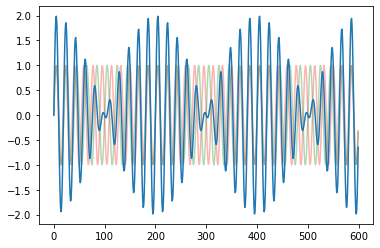

In [7]:
signal_1 = get_sine_wave(440, 2, 8000)
signal_2 = get_sine_wave(400, 2, 8000)
samples = 600

plt.plot(signal_1[:samples], "red", alpha=0.3)
plt.plot(signal_2[:samples], "green", alpha=0.3)
plt.plot(signal_1[:samples] + signal_2[:samples])

ipd.Audio(signal_1 + signal_2, rate=8000)

## Damped Sine (Task 5)

A damped sine can be defined as

\begin{equation}
x(t) = \mathrm{sin}(2 \pi f t) \mathrm{e}^{- \alpha t}
\end{equation}

The following code generates a sine signal and a decaying shape. The damped sine signal is generated by multiplying the two signals sample by sample.

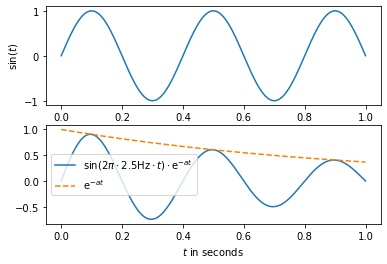

In [8]:
fs=8000
t=np.arange(0,1,1/fs) # crete time vector of 1 second length
f = 2.5               # 2.5 Hz 
alpha = 1             # daming factor (play around with it and see what happens)

sin  = np.sin(2*np.pi*f*t)
damp = np.exp(-alpha*t)
x = sin * damp

plt.subplot(2,1,1)
plt.plot(t,sin)
plt.ylabel('sin($t$)')

plt.subplot(2,1,2)
plt.plot(t,x, label='sin$(2 \pi \cdot ' + str(f) + ' \mathrm{Hz} \cdot t) \cdot \mathrm{e}^{- a t}$')
plt.plot(t,damp, '--', label='$\mathrm{e}^{- a t}$')
plt.legend()
plt.xlabel('$t$ in seconds'); # the ; also suppresses output, try to delete it

In the following we will replay the alternating tones, first without damping.

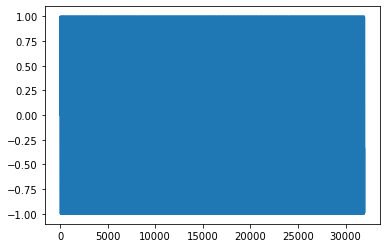

In [9]:
concert_pitch_1sec = get_sine_wave(440, 1, 8000)
half_concert_pitch_1sec = get_sine_wave(220, 1, 8000)

alternation_1sec = np.concatenate((half_concert_pitch_1sec, concert_pitch_1sec,
                                     half_concert_pitch_1sec, concert_pitch_1sec))

#plot the tune
plt.plot(alternation_1sec) # you can't see much here, it will get clear together with the next plot

ipd.Audio(alternation_1sec, rate=8000)

Below we can observe the effect of dampening on musical tones - the dampened sythesised tune sounds more 'natural'.
(This technique is used in MIDI instument sythesis).

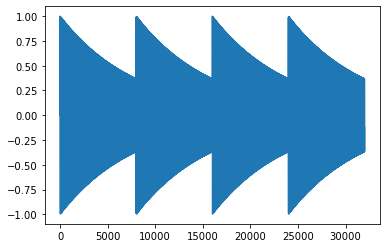

In [10]:
alternation_damped = np.concatenate((half_concert_pitch_1sec* damp, concert_pitch_1sec* damp,
                                     half_concert_pitch_1sec* damp, concert_pitch_1sec* damp))

#plot the tune
plt.plot(alternation_damped)

ipd.Audio(alternation_damped, rate=8000)

## Play a song (Task 6 and 7)

By generating sine waves of different lengths and frequencies with `get_sine_wave` you are now able to play simple songs.

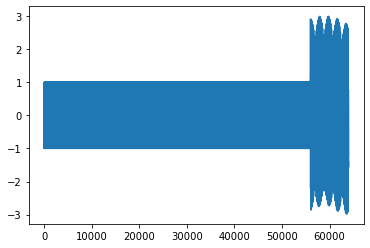

In [11]:
#create musical notes 
g = get_sine_wave(196.00)
a = get_sine_wave(220)
b = get_sine_wave(246.94)
d = get_sine_wave(293.66)
c = get_sine_wave(261.63)
e = get_sine_wave(329.63)
#append together to form tune + chord 
tune = [b,d,a,g,a,b,d,(g+b+d)]
tune = np.concatenate(tune)
#plot the tune
plt.plot(tune)
#audio player for the tune 
ipd.Audio(tune,rate=8000) 

Below we can again observe the effect of dampening on musical tones.

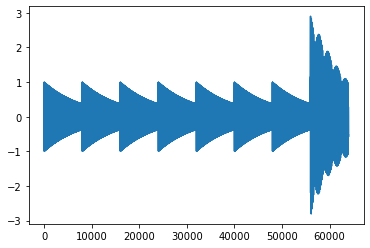

In [12]:
#create dampened musical notes 
g = get_sine_wave(196.00)*damp
a = get_sine_wave(220)*damp
b = get_sine_wave(246.94)*damp
d = get_sine_wave(293.66)*damp
c = get_sine_wave(261.63)*damp
e = get_sine_wave(329.63)*damp

#create tune 
tune = [b,d,a,g,a,b,d,(g+b+d)]
tune = np.concatenate(tune)
#plot dampened tune waveform
plt.plot(tune)
#audio player for dampened tune
ipd.Audio(tune,rate=8000) 

### Optional task: Play a (more complicated) song "with both hands"

This is a task would have taken more time than you have during the lab time. Therefore, here only a demo is given (for those interested) Feel free to ingore everything until Task 8 (see below). 

The following figure visualises the notes we will play using both hands 

(the *right hand*) is described by the following notes and pauses:

![Piano](music-notes-begin.png)

| note   |  E5  |  D#5 |  E5  |  D#5 |  E5  |  B4  |  D5  |  C5  |  A4  |  Pause  | ...  |
| ------ | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ------- | ---- |
| length | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/8  |  1/16   | ...  |

Lengths of notes are given by halving:
A half note has half the length as a whole note, a quarter note is half a half note (or quarter of a whole note), etc. Note durations can also be more complex, such as 3/4 or 3/2.

For the following song you should choose an appropriate `sample_rate_hz` and duration for the whole note. Specifically make sure that multiplying the `sample_rate_hz` with the duration of the sixteenth note gives an integer result with no rounding required.
    
- E5 1/16, D#5 1/16
- E5 1/16, D#5 1/16, E5 1/16, B4 1/16, D5 1/16, C5 1/16
- A4 1/8, Pause 1/16, C4 1/16, E4 1/16, A4 1/16
- B4 1/8, Pause 1/16, E4 1/16, G#4 1/16, B4 1/16
- C4 1/8, Pause 1/16, E4 1/16, E5 1/16, D#5 1/16
- E5 1/16, D#5 1/16, E5 1/16, B4 1/16, D5 1/16, C5 1/16
- A4 1/8, Pause 1/16, C4 1/16, E4 1/16, A4 1/16
- B4 1/8, Pause 1/16, E4 1/16, C5 1/16, B4 1/16
- A4 1/4

The other part (the *left hand*) is described as follows:
- Pause 1/8
- Pause 3/8
- A2 1/16, E3 1/16, A3 1/16, Pause 3/16
- E2 1/16, E3 1/16, G#3 1/16, Pause 3/16
- A2 1/16, E3 1/16, B3 1/16, Pause 3/16
- Pause 3/8
- A2 1/16, E3 1/16, A3 1/16, Pause 3/16
- E2 1/16, E3 1/16, G#3 1/16, Pause 3/16
- A2 1/16, E3 1/16, B3 1/16, Pause 1/16

A simple additional feature we need to generate a more advances song is a function to generate silence. The following function `get_silence` generates an array of 0-values of the desired length.

In [13]:
def get_silence(length_s, sample_rate_hz):
    """Return silence for the given length at the given sample rate."""
    return np.zeros(int(length_s * sample_rate_hz))

In [14]:
def create_tone(note, duration):
    
    tempo = 5

    if note == "Pause":
        return get_silence(length_s=duration*tempo, sample_rate_hz=8000)

    note_position = {
        "C": -9,
        "C#": -8,
        "D": -7,
        "D#": -6,
        "E": -5,
        "F": -4,
        "F#": -3,
        "G": -2,
        "G#": -1,
        "A": 0,
        "A#": 1,
        "B": 2,
    }

    octave = int(note[-1])
    key = note[:-1]

    frequency_hz = 440 * 2 ** ((note_position[key] / 12) + (octave - 4))

    return get_sine_wave(
        frequency_hz=frequency_hz, length_s=duration*tempo, sample_rate_hz=8000
    )

In [15]:
right_hand_notes = [
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("B4", 1 / 16),
    ("D5", 1 / 16),
    ("C5", 1 / 16),
    ("A4", 1 / 8),
    ("Pause", 1 / 16),
    ("C4", 1 / 16),
    ("E4", 1 / 16),
    ("A4", 1 / 16),
    ("B4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("G#4", 1 / 16),
    ("B4", 1 / 16),
    ("C4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("B4", 1 / 16),
    ("D5", 1 / 16),
    ("C5", 1 / 16),
    ("A4", 1 / 8),
    ("Pause", 1 / 16),
    ("C4", 1 / 16),
    ("E4", 1 / 16),
    ("A4", 1 / 16),
    ("B4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("C5", 1 / 16),
    ("B4", 1 / 16),
    ("A4", 1 / 4),
]

left_hand_notes = [
    ("Pause", 1 / 8),
    ("Pause", 3 / 8),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("A3", 1 / 16),
    ("Pause", 3 / 16),
    ("E2", 1 / 16),
    ("E3", 1 / 16),
    ("G#3", 1 / 16),
    ("Pause", 3 / 16),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("B3", 1 / 16),
    ("Pause", 3 / 16),
    ("Pause", 3 / 8),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("A3", 1 / 16),
    ("Pause", 3 / 16),
    ("E2", 1 / 16),
    ("E3", 1 / 16),
    ("G#3", 1 / 16),
    ("Pause", 3 / 16),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("B3", 1 / 16),
    ("Pause", 1 / 16),
]

Create one test tone to see if the function above works as expected.

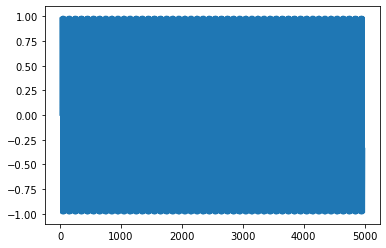

In [16]:
test_tone=create_tone("A4", 1/8)

plt.plot(test_tone)
ipd.Audio(test_tone, rate=8000)

And now let's go for a whole song.

In [17]:
right_hand = np.concatenate(
    [create_tone(note, duration) for note, duration in right_hand_notes]
)

left_hand = np.concatenate(
    [create_tone(note, duration) for note, duration in left_hand_notes]
)

In [18]:
song = left_hand + right_hand
ipd.Audio(song, rate=8000)

If you like you can now change the code above to include damping.

## Tasks 8, 9 - Sampling Frequency

The following (already known) commands can be used to do download a WAVE file to hard disk and the into memory.

In [19]:
import soundfile as sf # for loading wave files from hard disk

# download
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/music_44k.wav -o music_44k.wav 

# load WAVE files
mus_44k, fs44 = sf.read('music_44k.wav')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  435k  100  435k    0     0  4745k      0 --:--:-- --:--:-- --:--:-- 4780k


We use the `librosa` library to change the sampling frequency $f_s$.

In [ ]:
import librosa         # we will use librosa here for resampling

mus_8k = librosa.resample(mus_44k, fs44, 8000); # resample to 8 kHz
mus_44k_2 = librosa.resample(mus_8k, 8000, fs44); # resample to 44.1 kHz

#mus_8k, fs8 = librosa.load('music_44k.wav', sr=8000); # Downsample original file (44.1kHz) to 8kHz

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.specgram(mus_44k, Fs=fs44);
plt.title('original')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$')
plt.subplot(1,2,2)
plt.specgram(mus_44k_2, Fs=fs44);
plt.title('after down-/upsampling')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$');

Play the original file.

In [ ]:
ipd.Audio(mus_44k, rate=fs44)

Play the file after it has been converted to 8 kHz and the back to 44 kHz.

In [ ]:
ipd.Audio(mus_44k_2, rate=fs44)